# Tower of Hanoi

In [1]:
from utils import *

## PROBLEM

Let's see how we define a Problem. Run the next cell to see how abstract class `Problem` is defined in the search module.

In [2]:
class Problem:
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1
    

The `Problem` class has six methods.

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.

## NODE

Let's see how we define a Node. Run the next cell to see how abstract class `Node` is defined in the search module.

In [3]:
class Node:
    """A node in a search tree. Contains a pointer to the parent (the node
    that this is a successor of) and to the actual state for this node. Note
    that if a state is arrived at by two paths, then there are two nodes with
    the same state. Also includes the action that got us to this state, and
    the total path_cost (also known as g) to reach the node. Other functions
    may add an f and h value; see best_first_graph_search and astar_search for
    an explanation of how the f and h values are handled. You will not need to
    subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state

    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        """Build the child node"""
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action, problem.path_cost(self.path_cost, self.state, action, next_state))
        return next_node

    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.state for node in self.path()]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state


The `Node` class has nine methods. The first is the `__init__` method.

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

The next 4 methods are specific `Node`-related functions.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

The remaining 3 methods override standards Python functionality for representing an object as a string, the less-than ($<$) operator, and the equal-to ($=$) operator.

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

## Hanoi

In [145]:
class Hanoi(Problem):
    """ The problem of tower of hanoi """

    def __init__(self, n):
        """ Define goal state and initialize a problem """
        initial = 'A'*n
        goal = 'C'*n
        self.n = n
        super().__init__(initial, goal)

    def actions(self, state):
        """ Return the actions that can be executed in the given state.
        The result would be a list of tuples. For example, there are two actions
        in [('A','B'), ('A', 'C')] and the first action is ('A','B'), which
        means moving the top disk on peg A to peg B."""
        actions = []
        
        # your code goes here:      
        
        smallest_disk_peg = state[0]
        
        # Can move smallest disk to any other peg
        if smallest_disk_peg == 'A':
            actions.append(('A', 'B'))
            actions.append(('A', 'C'))
        if smallest_disk_peg == 'B':
            actions.append(('B', 'A'))
            actions.append(('B', 'C'))
        if smallest_disk_peg == 'C':
            actions.append(('C', 'A'))
            actions.append(('C', 'B'))
            
        # Check if all disks are on one peg
        disk_to_move = None
        for disk in state[1:]:
            if disk != smallest_disk_peg:
                disk_to_move = disk
                break
                
        if not disk_to_move:
            return actions
        
        # If all disks aren't on one peg, then you can move the first disk not on the same peg to the peg that isn't occupied by the smallest disk
        if disk_to_move == 'A':
            if smallest_disk_peg == 'B':
                actions.append((disk_to_move, 'C'))
            if smallest_disk_peg == 'C':
                actions.append((disk_to_move, 'B'))
            pass
        if disk_to_move == 'B':
            if smallest_disk_peg == 'A':
                actions.append((disk_to_move, 'C'))
            if smallest_disk_peg == 'C':
                actions.append((disk_to_move, 'A'))
        if disk_to_move == 'C':
            if smallest_disk_peg == 'A':
                actions.append((disk_to_move, 'B'))
            if smallest_disk_peg == 'B':
                actions.append((disk_to_move, 'A'))
                 
        return actions

    def result(self, state, action):
        """ Given state and action, return a new state that is the result of the action.
        Action is assumed to be a valid action in the state """

        # your code goes here:
        char_list = list(state)
        for i in range(len(char_list)):
            if char_list[i] == action[0]:
                char_list[i] = action[1]
                break
        return ''.join(char_list)

    def goal_test(self, state):
        """ Given a state, return True if state is a goal state or False, otherwise """
        if state == self.goal:
            return True
        return False

    def h(self, node):
        """ Return the heuristic value for a given state."""

        # your code goes here:
        return len([disk for disk in node.state if disk != 'C'])
    
    def draw(self, solution = None):
        """ Draw Hanoi 
        solutin is a list of states from start to goal:
        - if solution is not provided, draw the graphical representation of the whole state space.
        - if solution is provided, draw it as a red path. 
        """
        Draw_Hanoi(self.n, solution).draw()

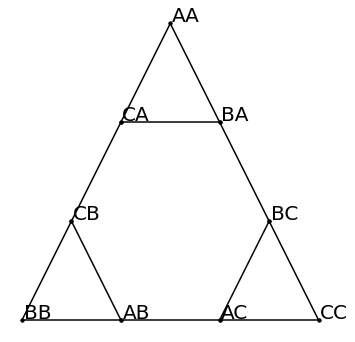

In [5]:
# Draw with 2 disks. 
puzzle = Hanoi(2)
puzzle.draw()

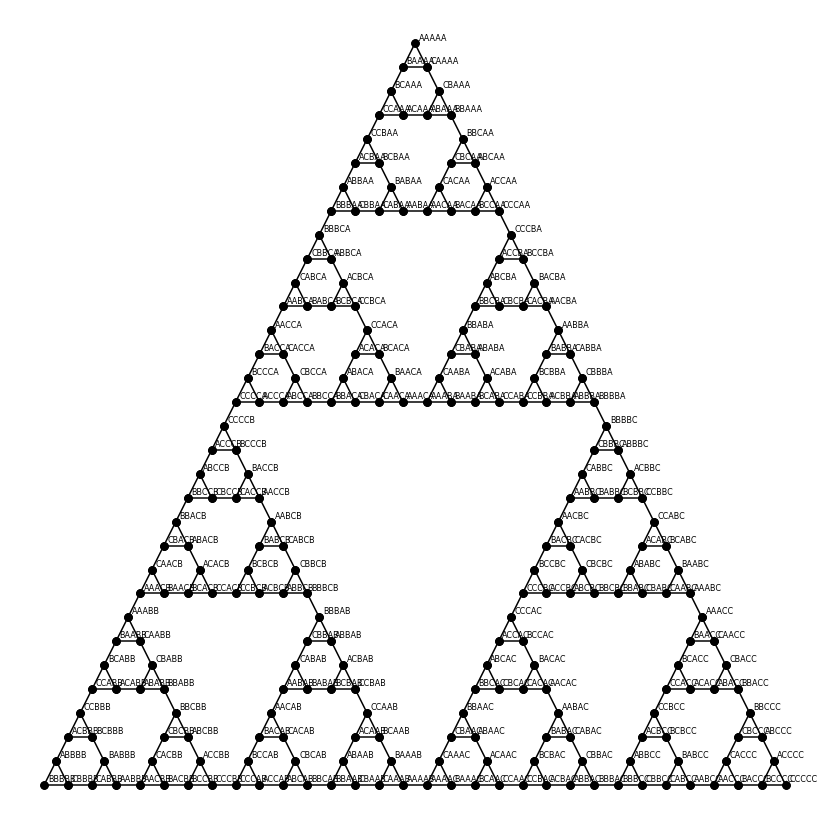

In [6]:
# Draw with 5 disks. 
puzzle = Hanoi(5)
puzzle.draw()

## BFS

Write your code below to implement BFS.

In [156]:
def BFS(problem):
    """
    You need to use functions defined in Node and Problem classes such as:
        node.expand(problem)
        problem.goal_test()
        
    Your code returns the last node when the node reaches the goal. 
    """
    node = Node(problem.initial)
    # your code goes here:
    visited_nodes = []
    queue = Queue()
    queue.push(node)
    
    while not queue.isEmpty():
            current_node = queue.pop()
            
            if problem.goal_test(current_node.state):
                return current_node
            
            visited_nodes.append(current_node)
            successors = current_node.expand(problem)
            for successor in successors:
                if successor in visited_nodes:
                    continue
                queue.push(successor)
            
    return node

['AA', 'BA', 'BC', 'CC']


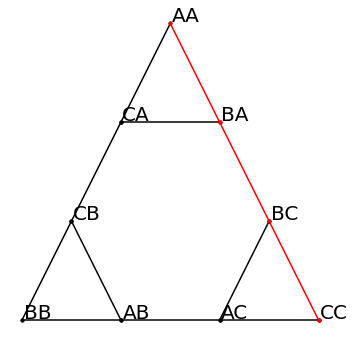

In [157]:
puzzle = Hanoi(2)

solution = ['AA', 'BA', 'BC', 'CC'] # expected solution
# uncomment this line to find the solution using your code. 
solution = BFS(puzzle).solution()

print(solution)
puzzle.draw(solution)

['AAAA', 'BAAA', 'BCAA', 'CCAA', 'CCBA', 'ACBA', 'ABBA', 'BBBA', 'BBBC', 'CBBC', 'CABC', 'AABC', 'AACC', 'BACC', 'BCCC', 'CCCC']


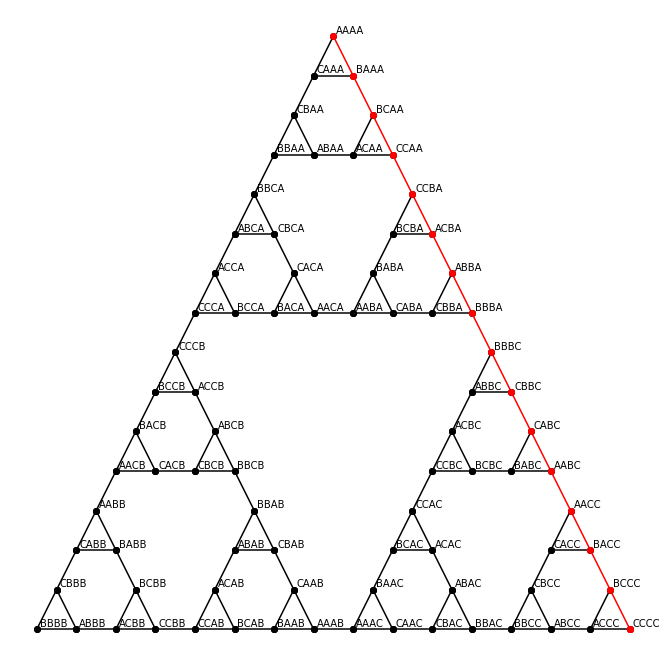

In [66]:
puzzle = Hanoi(4)
# expected solution
solution = ['AAAA', 'CAAA', 'CBAA', 'BBAA', 'BBCA', 'CBCA', 'CACA', 'BACA', 'BCCA', 'CCCA', 'CCCB', 'BCCB', 'BACB', 'CACB', 'CBCB', 'BBCB', 'BBAB', 'CBAB', 'CAAB', 'BAAB', 'AAAB', 'AAAC', 'CAAC', 'CBAC', 'BBAC', 'BBCC', 'CBCC', 'CACC', 'BACC', 'BCCC', 'CCCC']
 
# uncomment this line to find the solution using your code. 
solution = BFS(puzzle).solution()

print(solution)
puzzle.draw(solution)

['AAAAA', 'CAAAA', 'CBAAA', 'BBAAA', 'BBCAA', 'ABCAA', 'ACCAA', 'CCCAA', 'CCCBA', 'BCCBA', 'BACBA', 'AACBA', 'AABBA', 'CABBA', 'CBBBA', 'BBBBA', 'BBBBC', 'ABBBC', 'ACBBC', 'CCBBC', 'CCABC', 'BCABC', 'BAABC', 'AAABC', 'AAACC', 'CAACC', 'CBACC', 'BBACC', 'BBCCC', 'ABCCC', 'ACCCC', 'CCCCC']


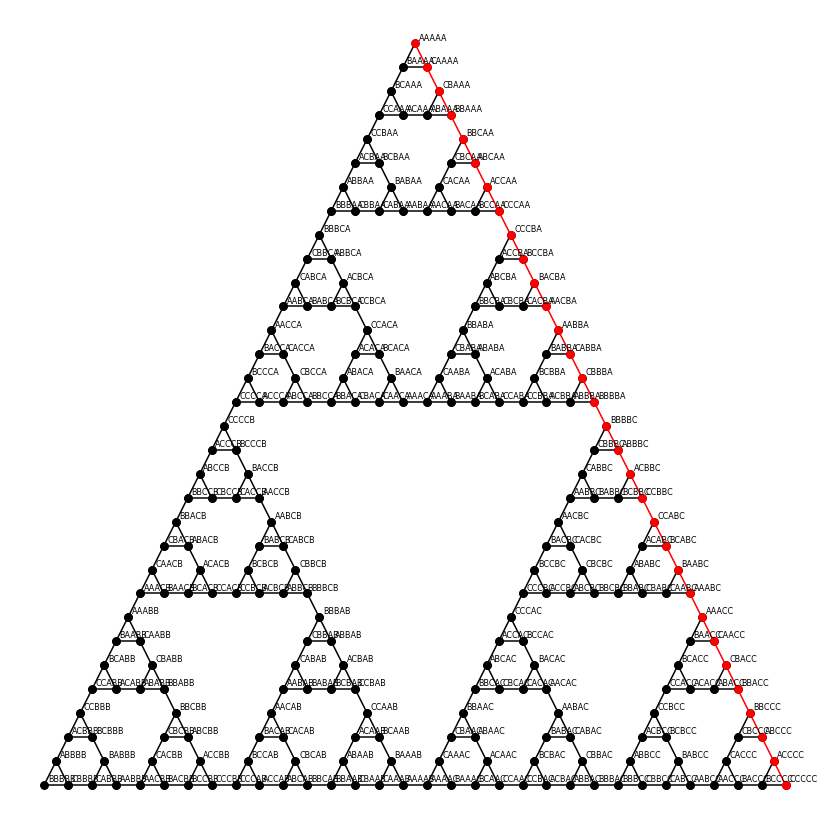

In [158]:
# test your code using 5 disks 
puzzle = Hanoi(5)
solution = BFS(puzzle).solution()
print(solution)
puzzle.draw(solution)

## DFS

Write your code below to implement DFS.

In [80]:
def DFS(problem):
    """
    You need to use functions defined in Node and Problem classes such as:
        node.expand(problem)
        problem.goal_test()
        
    Your code returns the last node when the node reaches the goal. 
    """
    node = Node(problem.initial)
    # your code goes here:
    visited_nodes = []
    stack = Stack()
    stack.push(node)
    
    while not stack.isEmpty():
            current_node = stack.pop()
            
            if problem.goal_test(current_node.state):
                return current_node
            
            visited_nodes.append(current_node)
            successors = current_node.expand(problem)
            for successor in successors:
                if successor in visited_nodes:
                    continue
                stack.push(successor)    
    
    return node

['CCCC', 'BCCC', 'BACC', 'CACC', 'CBCC', 'BBCC', 'BBAC', 'CBAC', 'CAAC', 'AAAC', 'AAAB', 'BAAB', 'CAAB', 'CBAB', 'BBAB', 'BBCB', 'CBCB', 'CACB', 'BACB', 'BCCB', 'CCCB', 'CCCA', 'BCCA', 'BACA', 'CACA', 'CBCA', 'BBCA', 'BBAA', 'CBAA', 'CAAA', 'AAAA']


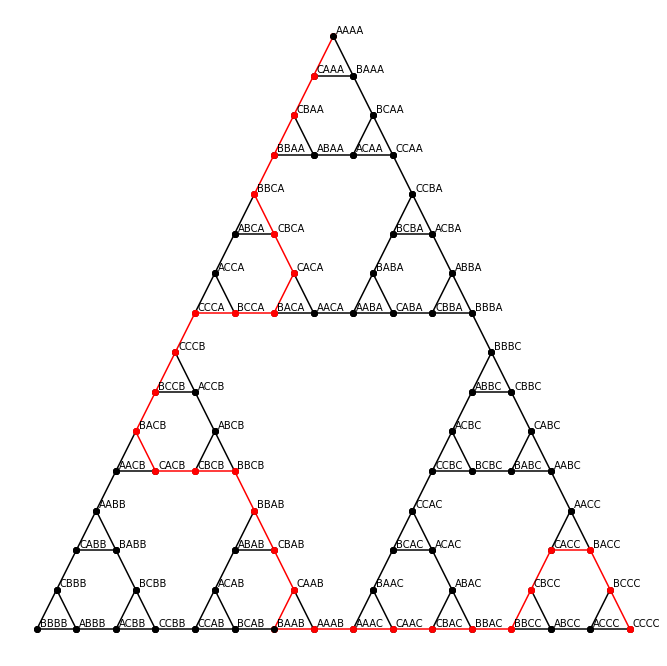

In [83]:
# test your code using 1-5 disks 
puzzle = Hanoi(4)
solution = DFS(puzzle).solution()
print(solution[::-1])
puzzle.draw(solution[::-1])

## A*

Write your code below to implement A*.

In [154]:
def astar_search(problem, h=None):
    """
    You need to use functions defined in Node and Problem classes such as:
        node.expand(problem)
        problem.goal_test()
        
    A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass.
        
    Your code returns the last node when the node reaches the goal. 
    """
    
    if not h:
        h = problem.h
        
    node = Node(problem.initial)
    # your code goes here:
    index = 0
    priority = h(node) + node.path_cost
    visited_nodes = []
    priority_queue = PriorityQueue()
    priority_queue.push(node, (priority, index))
    
    while not priority_queue.isEmpty():
        current_node = priority_queue.pop()
        
        if problem.goal_test(current_node.state):
            return current_node
        
        visited_nodes.append(current_node)
        successors = current_node.expand(problem)
        
        for successor in successors:
                if successor in visited_nodes:
                    continue
                index += 1
                priority_queue.push(successor, (h(successor) + current_node.path_cost, index))
    
    return node

['AAAAA', 'CAAAA', 'CBAAA', 'BBAAA', 'BBCAA', 'ABCAA', 'ACCAA', 'CCCAA', 'CCCBA', 'BCCBA', 'BACBA', 'AACBA', 'AABBA', 'CABBA', 'CBBBA', 'BBBBA', 'BBBBC', 'ABBBC', 'ACBBC', 'CCBBC', 'CCABC', 'BCABC', 'BAABC', 'AAABC', 'AAACC', 'CAACC', 'CBACC', 'BBACC', 'BBCCC', 'ABCCC', 'ACCCC', 'CCCCC']


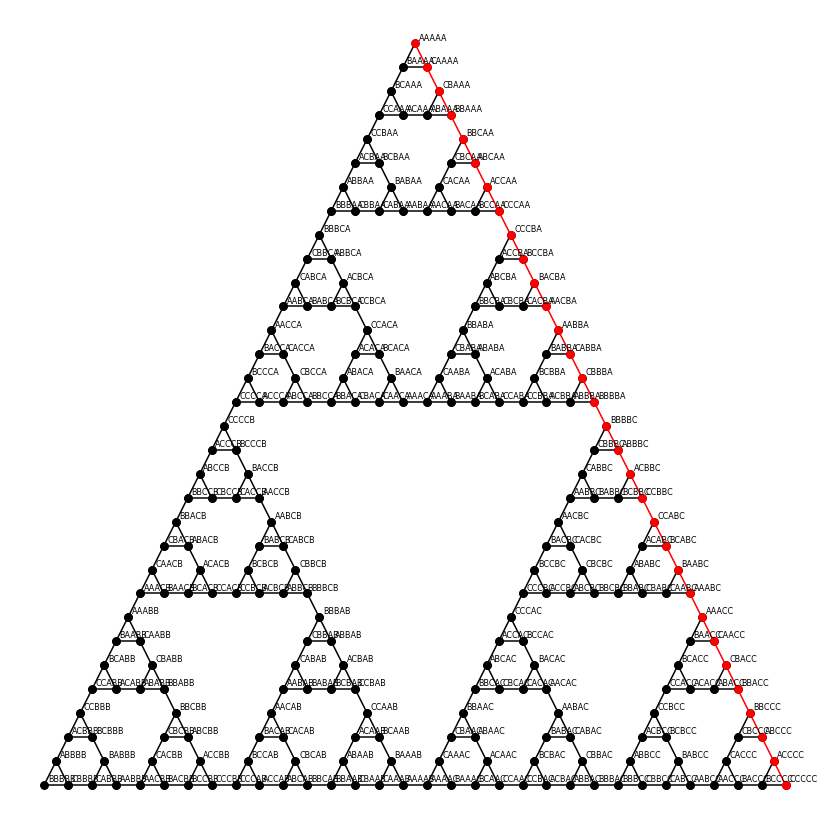

In [155]:
# test your code using 1-5 disks 
puzzle = Hanoi(5)
solution = astar_search(puzzle).solution()
print(solution)
puzzle.draw(solution)